In [24]:
import pandas as pd
import numpy as np
import datetime
from modules.MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from yahoo_fin.stock_info import get_data

from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas 

In [9]:
# Setting date range and tickers
start = datetime.datetime(2012, 12, 31)

ticker_list = ["MSFT", "^TNX", "BTC-USD", "BZ=F", "^GSPC"]
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = get_data(ticker, start_date = start, interval="1d")

In [10]:
historical_datas

{'MSFT':                   open        high         low       close    adjclose  \
 2012-12-31   26.590000   26.770000   26.370001   26.709999   22.024317   
 2013-01-02   27.250000   27.730000   27.150000   27.620001   22.774687   
 2013-01-03   27.629999   27.650000   27.160000   27.250000   22.469589   
 2013-01-04   27.270000   27.340000   26.730000   26.740000   22.049055   
 2013-01-07   26.770000   26.879999   26.639999   26.690001   22.007837   
 ...                ...         ...         ...         ...         ...   
 2023-02-06  257.440002  258.299988  254.779999  256.769989  256.769989   
 2023-02-07  260.529999  268.769989  260.079987  267.559998  267.559998   
 2023-02-08  273.200012  276.760010  266.209991  266.730011  266.730011   
 2023-02-09  273.799988  273.980011  262.799988  263.619995  263.619995   
 2023-02-10  261.529999  264.089996  260.660004  263.100006  263.100006   
 
               volume ticker  
 2012-12-31  42749500   MSFT  
 2013-01-02  52899300   MSFT

In [11]:
historical_datas['MSFT']

,open,high,low,close,adjclose,volume,ticker
2012-12-31,26.590000,26.770000,26.370001,26.709999,22.024317,42749500,MSFT
2013-01-02,27.250000,27.730000,27.150000,27.620001,22.774687,52899300,MSFT
2013-01-03,27.629999,27.650000,27.160000,27.250000,22.469589,48294400,MSFT
2013-01-04,27.270000,27.340000,26.730000,26.740000,22.049055,52521100,MSFT
2013-01-07,26.770000,26.879999,26.639999,26.690001,22.007837,37110400,MSFT
...,...,...,...,...,...,...,...
2023-02-06,257.440002,258.299988,254.779999,256.769989,256.769989,22518000,MSFT
2023-02-07,260.529999,268.769989,260.079987,267.559998,267.559998,50841400,MSFT
2023-02-08,273.200012,276.760010,266.209991,266.730011,266.730011,54686000,MSFT
2023-02-09,273.799988,273.980011,262.799988,263.619995,263.619995,42375100,MSFT


In [12]:
# Separate ticker data
STOCK = historical_datas['MSFT'].drop('ticker', axis=1)
BOND = historical_datas['^TNX'].drop('ticker', axis=1)
CRYPTO = historical_datas['BTC-USD'].drop('ticker', axis=1)
COMMS = historical_datas['BZ=F'].drop('ticker', axis=1)
MARKET = historical_datas['^GSPC'].drop('ticker', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([STOCK, BOND, CRYPTO, COMMS],axis=1, keys=ticker_list).dropna()

# Review the first 5 rows of the Alpaca DataFrame
display(ticker_data.head())
display(ticker_data.tail())


MSFT                                              \
                 open       high        low      close   adjclose   
2014-09-17  46.259998  46.689999  46.230000  46.520000  40.347477   
2014-09-18  46.590000  46.830002  46.459999  46.680000  40.486252   
2014-09-19  46.810001  47.570000  46.599998  47.520000  41.214794   
2014-09-22  47.299999  47.380001  46.980000  47.060001  40.815830   
2014-09-23  46.849998  46.980000  46.470001  46.560001  40.382179   

                          ^TNX                       ...     BTC-USD  \
                 volume   open   high    low  close  ...         low   
2014-09-17   38311900.0  2.578  2.616  2.551  2.600  ...  452.421997   
2014-09-18   35556600.0  2.625  2.642  2.616  2.629  ...  413.104004   
2014-09-19  202522400.0  2.611  2.629  2.582  2.587  ...  384.532013   
2014-09-22   38686100.0  2.562  2.578  2.547  2.566  ...  397.130005   
2014-09-23   33430300.0  2.549  2.556  2.533  2.535  ...  396.196991   

                                                     BZ=F             \
                 close    adjclose      volume       open       high   
2014-09-17  457.334015  457.334015  21056800.0  98.959999  99.540001   
2014-09-18  424.440002  424.440002  34483200.0  98.580002  99.139999   
2014-09-19  394.795990  394.795990  37919700.0  97.540001  98.480003   
2014-09-22  402.152008  402.152008  24127600.0  98.199997  98.199997   
2014-09-23  435.790985  435.790985  45099500.0  96.879997  97.570000   

                                                      
                  low      close   adjclose   volume  
2014-09-17  98.519997  98.970001  98.970001  14769.0  
2014-09-18  97.440002  97.699997  97.699997  15316.0  
2014-09-19  97.190002  98.389999  98.389999  12442.0  
2014-09-22  96.389999  96.970001  96.970001  12582.0  
2014-09-23  96.559998  96.849998  96.849998  13561.0  

[5 rows x 24 columns]

MSFT                                                  \
                  open        high         low       close    adjclose   
2023-02-06  257.440002  258.299988  254.779999  256.769989  256.769989   
2023-02-07  260.529999  268.769989  260.079987  267.559998  267.559998   
2023-02-08  273.200012  276.760010  266.209991  266.730011  266.730011   
2023-02-09  273.799988  273.980011  262.799988  263.619995  263.619995   
2023-02-10  261.529999  264.089996  260.660004  263.100006  263.100006   

                         ^TNX                       ...       BTC-USD  \
                volume   open   high    low  close  ...           low   
2023-02-06  22518000.0  3.599  3.644  3.599  3.634  ...  22692.025391   
2023-02-07  50841400.0  3.645  3.681  3.597  3.674  ...  22756.257812   
2023-02-08  54686000.0  3.658  3.692  3.630  3.653  ...  22731.097656   
2023-02-09  42375100.0  3.586  3.690  3.575  3.683  ...  21773.974609   
2023-02-10  25760900.0  3.686  3.747  3.673  3.744  ...  21539.392578   

                                                           BZ=F             \
                   close      adjclose        volume       open       high   
2023-02-06  22760.109375  22760.109375  2.382501e+10  79.750000  81.400002   
2023-02-07  23264.291016  23264.291016  2.718796e+10  81.400002  84.099998   
2023-02-08  22939.398438  22939.398438  2.537137e+10  84.029999  85.160004   
2023-02-09  21819.039062  21819.039062  3.257257e+10  85.070000  85.500000   
2023-02-10  21651.183594  21651.183594  2.707841e+10  84.230003  86.910004   

                                                      
                  low      close   adjclose   volume  
2023-02-06  79.089996  80.989998  80.989998  31365.0  
2023-02-07  81.180000  83.690002  83.690002  24432.0  
2023-02-08  83.500000  85.089996  85.089996  29853.0  
2023-02-09  83.059998  84.500000  84.500000  30520.0  
2023-02-10  83.940002  86.389999  86.389999  30520.0  

[5 rows x 24 columns]

Portfolio Composition

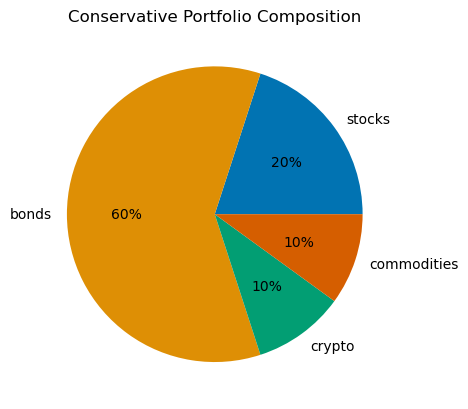

In [13]:
# Conservative Portfolio Composition
invested_amount = 100000
composition = [0.20*invested_amount,0.60*invested_amount,0.10*invested_amount,0.10*invested_amount]
composition_df = pd.DataFrame(composition, columns=["amount"], index=["stocks","bonds","crypto","commodities"])

# Use Seaborn to deliver plot including percentages for each category

# select a palette that takes into account colorblindness
palette_color = sn.color_palette('colorblind')
# plotting data on chart
plt.pie(composition_df.reset_index()['amount'],colors=palette_color,labels=composition_df.reset_index()['index'],autopct='%.0f%%')
plt.title("Conservative Portfolio Composition")
# displaying chart
plt.show()

Risk Return Analysis

In [14]:
STOCK_df = pd.DataFrame(STOCK)
BOND_df = pd.DataFrame(BOND)
CRYPTO_df = pd.DataFrame(CRYPTO)
COMMS_df = pd.DataFrame(COMMS)
MARKET_df = pd.DataFrame(MARKET)

stock_daily_return = pd.DataFrame(STOCK_df['adjclose'].pct_change())
bond_daily_return = pd.DataFrame(BOND_df['adjclose'].pct_change())
cypto_daily_return = pd.DataFrame(CRYPTO_df['adjclose'].pct_change())
comm_daily_return = pd.DataFrame(COMMS_df['adjclose'].pct_change())
market_daily_return = pd.DataFrame(MARKET_df['adjclose'].pct_change())

In [15]:
# Assign weights to each asset
weights = np.array([0.20, 0.60, 0.10, 0.10])

In [16]:
# Create the returns of the sythetic portfolio with those weights

synthetic_portfolio = pd.concat([stock_daily_return, bond_daily_return, cypto_daily_return,comm_daily_return], axis=1).dropna()
synthetic_portfolio.head()


,adjclose,adjclose,adjclose,adjclose
2014-09-18,0.003439,0.011154,-0.071926,-0.012832
2014-09-19,0.017995,-0.015976,-0.069843,0.007062
2014-09-22,-0.009680,-0.008117,0.008352,-0.014432
2014-09-23,-0.010625,-0.012081,0.083647,-0.001238
2014-09-24,0.011168,0.013412,-0.028881,0.001033


In [17]:
# Portfolio weighted returns
synthetic_portfolio_returns = pd.DataFrame(synthetic_portfolio.dot(weights)).rename(columns={0: 'adjclose'})
synthetic_portfolio_returns.head()

,adjclose
2014-09-18,-0.001096
2014-09-19,-0.012264
2014-09-22,-0.007415
2014-09-23,-0.001133
2014-09-24,0.007496


In [33]:
investment = 1000
allocation = [w * investment for w in weights]
amount = allocation/synthetic_portfolio.iloc[0]
stock_value = synthetic_portfolio * amount
stock_value.reset_index()

def show_chart():
    
    allocation = [w * investment for w in weights]
    amount = allocation/syntheic_portfolio_returns.iloc[0]
    stock_value = synthetic_portolio_returns * amount
    stock_value = synthetic_portfolio_returns.sum(axis=1).reset_index().rename(columns={0:"Total Value ($)"}).set_index('index')
    plot_title = "title"
    fig0 = Figure(figsize=(16,8))
    ax0 = fig0.subplots()

    chart = ax0.plot(stock_value['Total Value ($)'])

    ax0.set_title(plot_title)
 
    return fig0

show_chart()

NameError: name 'syntheic_portfolio_returns' is not defined

In [80]:
# Market (S&P) cumulative returns
df_market_cum_returns = (1 + market_daily_return).cumprod()

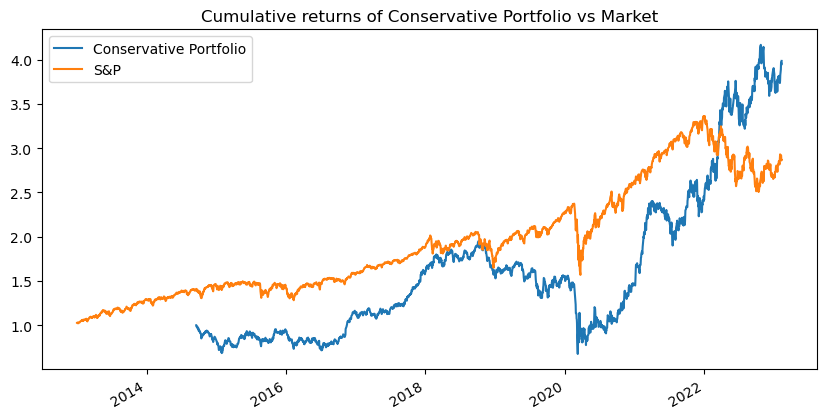

In [81]:
# Calculate cumulative returns and plot them vs market
df_cumulative_returns = (1 + synthetic_portfolio_returns).cumprod()

#df_cumulative_returns.plot(figsize=(20,10), title="Cumulative returns of Conservative Portfolio")

ax = df_cumulative_returns.plot(figsize=(10,5), title="Cumulative returns of Conservative Portfolio vs Market")
df_market_cum_returns.plot(ax=ax)

ax.legend(['Conservative Portfolio',
         'S&P'])



<AxesSubplot:title={'center':'Spread of daily returns of Portfolio'}>

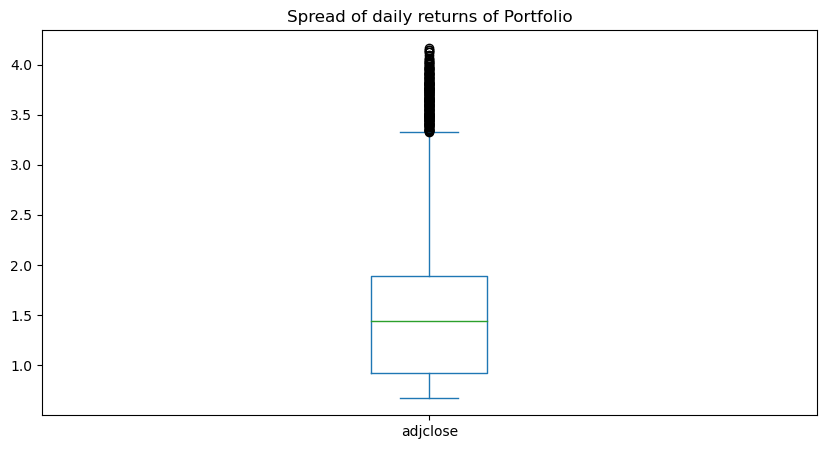

In [82]:
# Volatility Analysis

df_cumulative_returns.plot(kind='box', figsize=(10,5), title="Spread of daily returns of Portfolio")

In [83]:
# Calculate the standard deviation
portfolio_standard_dev = df_cumulative_returns.std()
portfolio_standard_dev

adjclose    0.86192
dtype: float64

In [84]:
# Calculate the annualized standard deviation (252 trading days)
trading_days = 252

annual_portfolio_standard_dev = df_cumulative_returns.std() * np.sqrt(trading_days)
annual_portfolio_standard_dev

adjclose    13.682553
dtype: float64

In [85]:
# Plot Standard deviation vs S&P500

In [86]:
# Analyse Risk-return profile

# Annual average return
annual_average_portfolio_returns = synthetic_portfolio_returns.mean() * trading_days
annual_average_portfolio_returns


adjclose    0.227312
dtype: float64

In [87]:
# Annualized Sharpe Ratio
portfolio_sharpe_ratio = annual_average_portfolio_returns / annual_portfolio_standard_dev
portfolio_sharpe_ratio

adjclose    0.016613
dtype: float64

In [91]:
# BETA ANALYSIS

# Calculate the variance of the S&P 500 using a rolling 60-day window.
variance_market_60 = market_daily_return.rolling(window=60).var()

# Calculate the covariance of the Portfolio using a 60-day rolling window 
portfolio_cov = synthetic_portfolio_returns.rolling(window=60).cov(market_daily_return)

# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
portfolio_beta = portfolio_cov/variance_market_60

# Calculate the average of the 60-day rolling beta
#portfolio_beta.mean()
portfolio_beta.mean()

adjclose    0.892724
dtype: float64

<AxesSubplot:title={'center':'Portfolio 60-day rolling Beta'}>

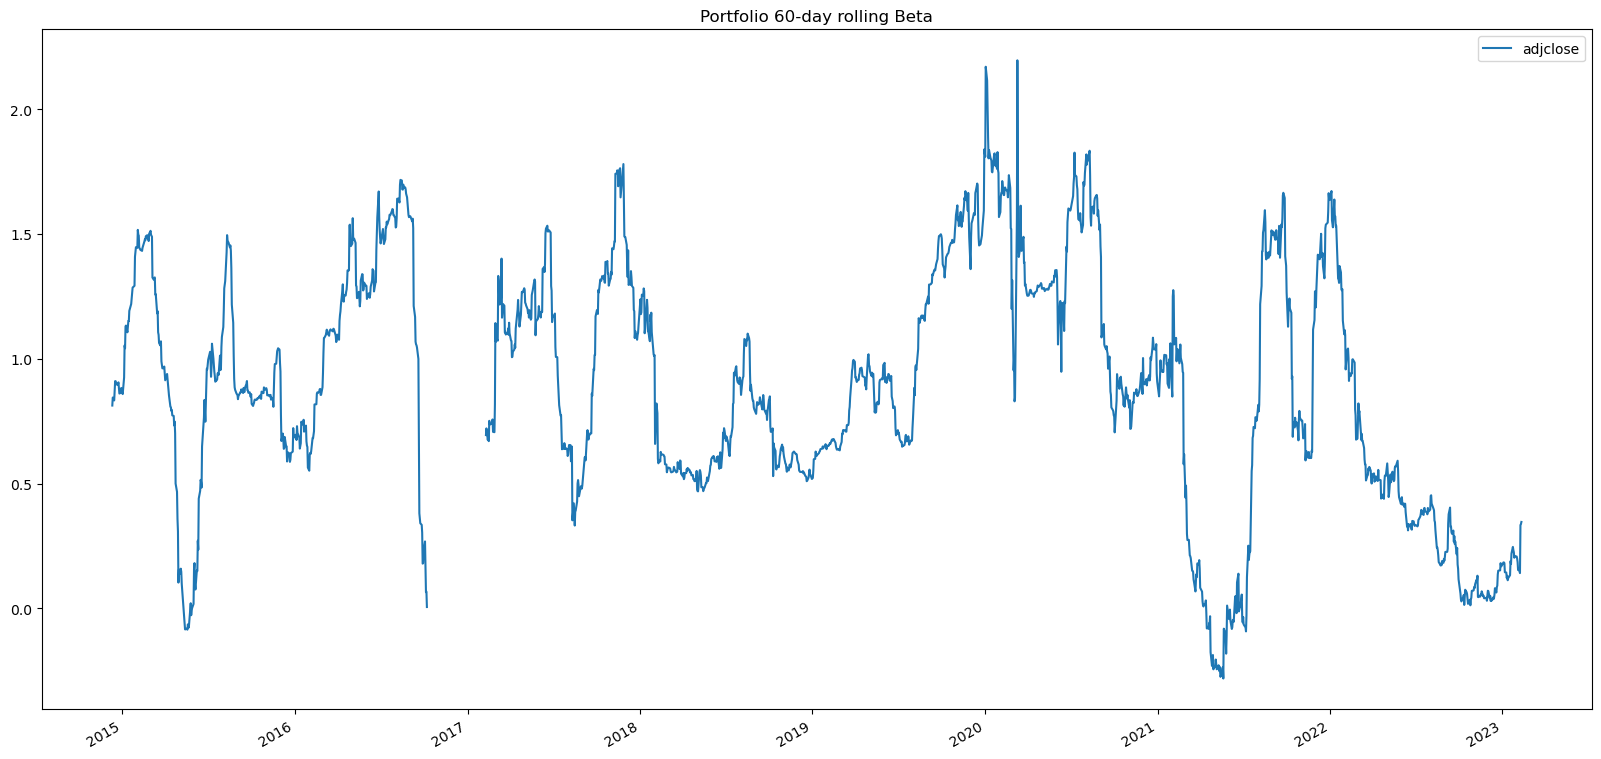

In [92]:
# Plot the rolling beta 
portfolio_beta.plot(figsize=(20,10), title="Portfolio 60-day rolling Beta")

# Plot Beta of 2 Portfolios
# ax = berkshire_beta.plot(figsize=(20,10), title="Beta Berkshire vs Tiger")
# tiger_beta.plot(ax=ax)

# ax.legend(['BERKSHIRE Beta',
#           'TIGER Beta'])

Monte Carlo simulation of 200 samples and 20 years for each Portfolio (composition stocks/bonds/cryptos/commodities)

In [93]:
# 1. Conservative: 20%/60%/10%/10%

twenty_year_simulation = MCSimulation(
    portfolio_data = ticker_data,
    weights=[0.20,0.60,0.10,0.10],
    num_simulation = 200,
    num_trading_days =252*20
)

# Review the simulation input data
twenty_year_simulation.portfolio_data.head()


MSFT                                              \
                 open       high        low      close   adjclose   
2014-09-17  46.259998  46.689999  46.230000  46.520000  40.347488   
2014-09-18  46.590000  46.830002  46.459999  46.680000  40.486240   
2014-09-19  46.810001  47.570000  46.599998  47.520000  41.214790   
2014-09-22  47.299999  47.380001  46.980000  47.060001  40.815834   
2014-09-23  46.849998  46.980000  46.470001  46.560001  40.382175   

                                       ^TNX                ...     BTC-USD  \
                 volume daily_return   open   high    low  ...    adjclose   
2014-09-17   38311900.0          NaN  2.578  2.616  2.551  ...  457.334015   
2014-09-18   35556600.0     0.003439  2.625  2.642  2.616  ...  424.440002   
2014-09-19  202522400.0     0.017995  2.611  2.629  2.582  ...  394.795990   
2014-09-22   38686100.0    -0.009680  2.562  2.578  2.547  ...  402.152008   
2014-09-23   33430300.0    -0.010625  2.549  2.556  2.533  ...  435.790985   

                                          BZ=F                        \
                volume daily_return       open       high        low   
2014-09-17  21056800.0          NaN  98.959999  99.540001  98.519997   
2014-09-18  34483200.0    -0.071926  98.580002  99.139999  97.440002   
2014-09-19  37919700.0    -0.069843  97.540001  98.480003  97.190002   
2014-09-22  24127600.0     0.018632  98.199997  98.199997  96.389999   
2014-09-23  45099500.0     0.083647  96.879997  97.570000  96.559998   

                                                        
                close   adjclose   volume daily_return  
2014-09-17  98.970001  98.970001  14769.0          NaN  
2014-09-18  97.699997  97.699997  15316.0    -0.012832  
2014-09-19  98.389999  98.389999  12442.0     0.007062  
2014-09-22  96.970001  96.970001  12582.0    -0.014432  
2014-09-23  96.849998  96.849998  13561.0    -0.001238  

[5 rows x 28 columns]

In [94]:
# Run the Monte Carlo simulation to forecast 20 years cumulative returns
twenty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983474,1.003936,1.032112,0.983273,1.027278,1.026417,1.034632,0.996957,1.012406,1.043088,...,0.993316,1.027736,1.043249,0.998207,1.047007,1.057465,0.992149,1.020538,0.992146,0.998306
2,1.009564,0.999807,1.038197,1.000382,0.997603,1.022109,1.011904,0.981737,1.012410,1.053938,...,1.021261,1.033934,1.050507,1.012967,1.052708,1.072289,1.001206,1.026174,1.010585,1.001564
3,0.989427,1.002052,1.045582,0.974593,1.028049,1.018063,1.004438,1.016491,1.000913,1.052392,...,1.046339,1.037884,1.056742,1.004652,1.065248,1.070377,0.997007,1.021161,1.025642,1.024066
4,1.025165,0.976275,1.083730,0.988755,1.053088,1.002229,0.992930,0.999376,0.971192,1.062926,...,1.056468,1.104555,1.066507,1.044954,1.045792,1.059792,1.017259,0.985390,1.057071,1.041731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,135.199643,8.658245,115.443230,125.670781,9.342795,1313.716523,10.832522,6.563116,6.437101,104.557699,...,324.447188,167.704191,5.407917,28.964169,26.301766,74.815257,7.627135,73.954904,267.750399,46.970041
5037,134.688794,8.700467,113.327731,127.322422,9.697672,1301.132638,11.219322,6.717353,6.416667,105.720550,...,312.927947,166.477903,5.333085,28.579744,26.584052,75.632850,7.614084,72.327210,263.804902,47.692446
5038,136.270150,8.491663,113.476397,125.721099,9.506869,1293.945442,11.073362,6.719864,6.439530,105.107015,...,307.570392,169.985754,5.577750,28.414283,25.901895,76.044580,7.700731,73.134954,267.193981,48.329891
5039,134.666447,8.364307,113.726535,131.445030,9.924874,1299.692308,11.241128,6.560338,6.480714,106.725776,...,307.128011,168.418651,5.369577,28.851239,25.878871,75.110349,7.385047,72.970551,261.681954,46.758091


<AxesSubplot:title={'center':'200 Simulations of Cumulative Portfolio Return Trajectories Over the Next 5040 Trading Days.'}>

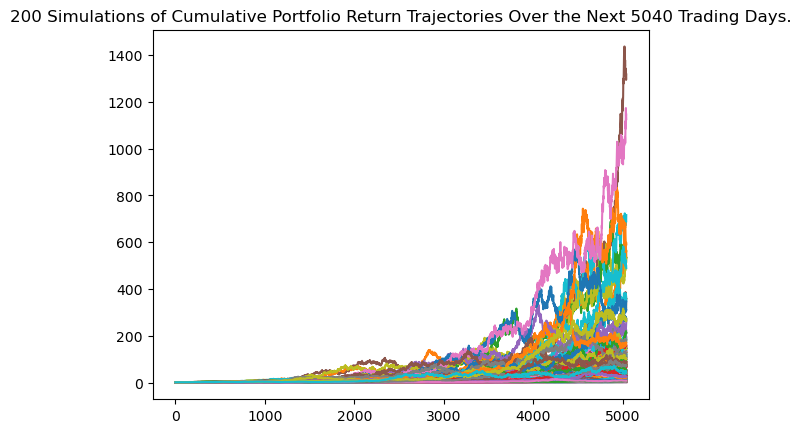

In [95]:
# Visualize the Monte Carlo simulation by creating an overlay line plot
twenty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 200 Simulations'}, ylabel='Frequency'>

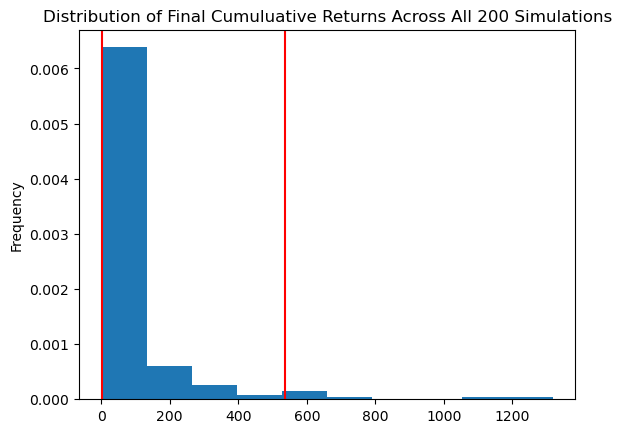

In [96]:
# Visualize the probability distribution of the Monte Carlo simulation by plotting a histogram
twenty_year_simulation.plot_distribution()

In [97]:
# Generate Stats and state Forecast

stats_twenty = twenty_year_simulation.summarize_cumulative_return()
stats_twenty

count            200.000000
mean              88.558082
std              164.080584
min                1.355039
25%               12.497132
50%               31.062797
75%               89.781716
max             1317.137471
95% CI Lower       2.728062
95% CI Upper     535.916324
Name: 5040, dtype: float64

In [98]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_twenty_cumulative_return = round(stats_twenty[8]*invested_amount,2)
ci_upper_twenty_cumulative_return = round(stats_twenty[9]*invested_amount,2)

# Print the result of your calculations
print(f"""There is a 95% chance that the final portfolio
value after 20 years will be within the range of
${ci_lower_twenty_cumulative_return:,.2f} and ${ci_upper_twenty_cumulative_return:,.2f} based
upon an initial investment of ${invested_amount:,.2f}
""")

There is a 95% chance that the final portfolio
value after 20 years will be within the range of
$272,806.19 and $53,591,632.39 based
upon an initial investment of $100,000.00

